#### 이산형 확률분포 


In [44]:
# 1차원 이산확률분포 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_set = np.array([1,2,3,4,5,6])
#불공정한 주사위 
def f(x): 
    if x in x_set:
        return x/ 21
    else:
        return 0
    
X=[x_set,f]


In [46]:
prob = np.array([f(x_k) for x_k in x_set])
print(prob,'\n')
#x_k와 p_k 대응을 사전식으로 표시
dict(zip(x_set,prob))
#x_set 확률변수에 대응되는 거 확률이잖아


[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429] 



{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

Text(0, 0.5, 'prob')

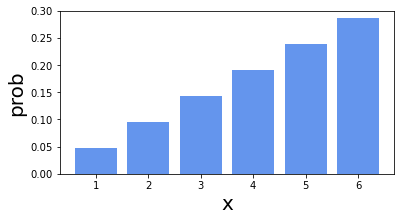

In [47]:
fig=plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
plt.bar(x_set,prob,color='cornflowerblue')
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('prob',fontsize=20)

C:\Users\admin\Anaconda3\envs\cakd5\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Bar Graph')

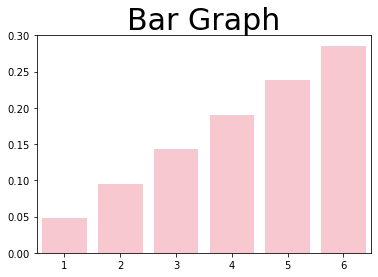

In [48]:
import seaborn as sns
sns.barplot(x_set,prob,color='pink')
plt.title('Bar Graph',fontsize=30)


In [5]:
np.all(prob>=0)


True

In [6]:
np.sum(prob)

0.9999999999999999

In [7]:
#누적분포함수 
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k<=x])
F(3)

0.2857142857142857

In [8]:
# 확률변수의 변환: 확률변수 X에 2를 곱하고 3을 더한 2X+3도 확률
#변수가 된다
y_set = np.array([2* x_k +3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set,prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [9]:
#1차원 이산형 확률변수의 지표
#평균: 확률변수의 평균은 확률변수의 중심을 나타내는 지표가 되며 기댓값이라고 
#부른다
np.sum([x_k*f(x_k) for x_k in x_set])

4.333333333333333

In [10]:
#확률변수의 기댓값은 확률변수를 무제한 시행하여 얻은 실현값의 평균
sample =np.random.choice(x_set,int(1e6),p=prob)
np.mean(sample)

4.332879

In [11]:
#일반화
def E(X,g=lambda x:x):
    x_set,f = X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])
E(X)

4.333333333333333

In [25]:
def E(x,g=lambda x:x)
    x_set,f =X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])
E(X)

SyntaxError: invalid syntax (Temp/ipykernel_4924/2417571912.py, line 1)

In [26]:
E(X, g=lambda x: 2*x+3)

8.999999996397552

In [ ]:
#기댓값의 선형성
2*E(X)+3

In [27]:
#분산
mean=E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

1094.761905065273

In [29]:
#일반화
def V(X,g=lambda x: x):
    x_set, f= X
    mean=E(X,g)
    return np.sum([g(x_k)-mean**2 * f(x_k) for x_k in x_set])
V(X)

181.00000001080736

In [31]:
V(X,lambda x:2*x+3)

359.0000000715788

In [33]:
#분산의 공식
2**2*V(X)

724.0000000432294

In [36]:
#2차원 이산형 확률분포
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [38]:
#확률변수 X,Y를 동시에 고려한 분포 결합: 결합확률분포
def f_XY(x,y):
    if 1<=y<=6 and 1<=x-y<=6:
        return y*(x-y)/441
    else:
        return 0


In [40]:
XY = [x_set,y_set,f_XY]

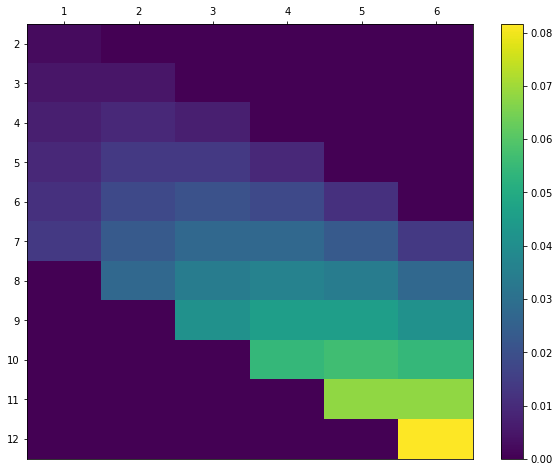

In [42]:
prob=np.array([[f_XY(x_i,y_j) for y_j in y_set]
              for x_i in x_set])
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1])+0.5,minor=False)
ax.set_yticks(np.arange(prob.shape[0])+0.5,minor=False)
ax.set_xticklabels(np.arange(1,7),minor=False)
ax.set_yticklabels(np.arange(2,13),minor=False)
#Y축을 내림차순의 숫자가 되게 하여 위아래를 역전시킨다.
ax.invert_yaxis()#원래대로하면 12,11~2까지 있었음
#x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()  
fig.colorbar(c,ax=ax)
plt.show()

In [43]:
ax.set_xticks(np.arange(prob.shape[1]+0.5,minor=False))
c-ax.pcolor

TypeError: arange() got an unexpected keyword argument 'minor'

In [ ]:
np.all(prob>=0)

In [ ]:
np.sum(prob)

In [ ]:
#주변확률분포 : 확률변수(X,Y)는 결합확률분포에 의해 동시에 정의되지만
#개별 확률변수에만 흥미가 있을 수 있다.
#확률변수 X만의 움직임. 즉 확률변수 X의 확률함수를 알고 싶은 상황


In [ ]:
def f_X(x):
    return np.sum([f_XY(x,y_k) for y_k in y_set])

In [ ]:
def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])

In [ ]:
X = [x_set,f_X]
Y = [y_set,f_Y]

In [ ]:
X

In [ ]:
Y

In [ ]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set,prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X lable')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set,prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

In [ ]:
#2차원 이산형 확률분포의 자료
#기댓값
np.sum([x_i*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [49]:
sum=0
for y_j in y_set:
    for x_i in x_set:
        sum+=x_i*f_XY(x_i,y_j)
sum

0.8253968253968254

In [50]:
#다중for문
def E(XY,g):
    x_set,y_set,f_XY=XY
    return np.sum([g(x_i,y_j)*f_XY(x_i,y_j)
                for x_i in x_set for y_j in y_set])
                

In [51]:
def E(XY,g):
    x_set,y_set,f_XY=XY
    return np.sum([g(x_i,y_j)*f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])
mean_x = E(XY,lambda x,y:x)
mean_x

8.666666666666666

In [52]:
mean_y = E(XY,lambda x,y:y)
mean_y

4.333333333333333

In [54]:
# 기댓값의 선형성
a,b=2,3
E(XY,lambda x, y: a*x+b*y)

30.333333333333332

In [57]:
a*mean_x + b*mean_y

30.333333333333332

In [59]:
#분산의 함수
def V(XY,g):
    x_set,y_sey,f_XY=XY
    mean=E(XY,g)
    return np.sum([(g(x_i,y_j)-mean)**2*f_XY(x_i,y_j)
                   for x_i in x_set for y_j in y_set])


In [60]:
var_X =V(XY,g=lambda x,y: x)
var_X

4.444444444444444

In [61]:
var_Y =V(XY,g= lambda x,y:y)
var_Y

2.2222222222222223

In [62]:
def Cov(XY):
    x_set,y_set, f_XY= XY
    mean_X =E(XY,lambda x,y:x)
    mean_Y = E(XY,lambda x,y:y)
    return np.sum([(x_i-mean_X)*(y_j-mean_Y)*f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])
cov_xy = Cov(XY)
cov_xy    

2.222222222222222

In [63]:
cov_xy = Cov(XY)
cov_xy

2.222222222222222

In [64]:
V(XY,lambda x,y: a*x+b*y)

64.44444444444444

In [67]:
a**2*var_X+b**2*var_Y+2*a*b*cov_xy


64.44444444444443

In [68]:
#확률변수의 상관계수: 공분산을 각각의 표준편차로 나누어 산출
cov_xy/np.sqrt(var_X*var_Y)


0.7071067811865474

#### 대표적인 이산형 확률분포

In [69]:
#assert: 원하는 조건의 변수 값을 보증받을 때까지 테스트
#그래프를 위한 사용자 함수
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
linestyles= ['-','--',':']
# x 확률변수의 기대값
def E(X,g=lambda x:x):
    x_set,f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])
def V(X, g=lambda x:x):
    x_set,f = X
    mean =E(X,g)
    return np.sum([(g(x_k)-mean)**2*f(x_k) for x_k in x_set])
def check_prob(X): # 확률분포를 인수로 가지면 기댓값과 분산 계산 결과를 반환
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum ==1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')
    
def plot_prob(X):#확률분포를 인수로 가지며 그 확률변수의 확률함수와 기대값
    #그리기 위한 함수
    x_set,f =X #확률변수와 확률함수
    prob= np.array([f(x_k) for x_k in x_set])
    fig = plt.figure(figsize=(6,4))
    ax=fig.add_subplot(111)
    ax.bar(x_set,prob,label='prob')
    ax.vlines(E(X),0,1,label='mean',color='crimson')
    ax.set_xticks(np.append(x_set,E(X)))
    ax.set_ylim(0,prob.max()*1.2)
    ax.legend()
    
    plt.show()
    

#### 베르누이 분포
- 가장 기본적인 이산형 확률분포로 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포이다.
-  베르누이 분포를 따르는 확률변수의 시행을 베르누이 시행이라 하며 1이 나오면 성공,0이 나오면 실패
- 동전을 던져 앞면이 나올 확률,주사위를 한 번 굴려 6이 나오지 않을 확률

In [71]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x*(1-p)**(1-x) # p의 x승 곱하기 1-p에 1-x승
        # 확률변수 (x) ,(1-p)는 실패하는 확률에는 (1-x)승
        else:
            return 0
    return x_set,f
p=0.3
X=Bern(p)
X

(array([0, 1]), <function __main__.Bern.<locals>.f(x)>)

In [72]:
check_prob(X)

expected value 0.3
variance 0.21


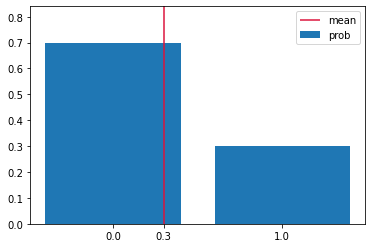

In [74]:
plot_prob(X)

In [75]:
rv=stats.bernoulli(p)


In [76]:
#probability 
rv.pmf(0),rv.pmf(1) 


(0.7, 0.3)

In [77]:
rv.pmf([0,1])

array([0.7, 0.3])

In [78]:
#누산분포함수 -이산형, 연속형 둘 다 가능
rv.cdf([0,1])

array([0.7, 1. ])

In [79]:
rv.mean(),rv.var()

(0.3, 0.21)

#### 이항분포 
- 성공확률이 p인 베르누이 시행을 n번 헀을 때의 성공 횟수가 따르는 분포
    f(x) = $_{n}\mathrm{C}_{x}(1-p)^{n-x}$ $(x \in \{0,1,2,,,,n\}$)
       0            (otherwise)


In [80]:


from scipy.special import comb
def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x)*p**x*(1-p)**(n-x)
        else:
            return 0
    return x_set,f


In [ ]:

from scipy.special import comb
def Bin(n,p):
    x_set=np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x)*p**x*(1-p)**(n-x)
        

In [81]:
#[과제] 동전을 10번 던져 앞면이 3번 나올 확률의 이항분포의 기대값과 분산을
##구하시오.
n=10
p=0.3
X=Bin(n,p)
check_prob(X)

expected value 3.0
variance 2.1


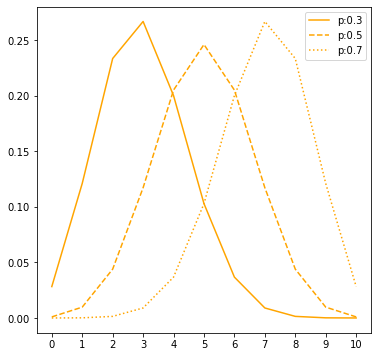

In [82]:
# [과제] 확률이 0.3, 0.5, 0.7로 변할 때 확률함수가 변화는 모습을 시각화 하세요

fig = plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)

x_set = np.arange(n+1)
for p,ls in zip([0.3,0.5,0.7],linestyles):
    # spicy.stats에서 이항분포의 확률변수는 binom함수로 생성가능 
    rv=stats.binom(n,p)
    ax.plot(x_set,rv.pmf(x_set),label=f'p:{p}',ls=ls,color='orange')
ax.set_xticks(x_set)
ax.legend()
plt.show()

#### 기하분포
- 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포
- 기하분포의 파라미터는 베르누이 새행의 성공 확률 파라미터 P가 되며 
 파라미터 P의 기하분포를 Ge(p)로 표기

f(x) = $(1-p)^{x-1}p$ $(x \in \{1,2,3,...\})$

     0              (otherwise)
- 기하분포의 기댓값과 분산 : E(X)=1/p,V(X) = (1-p)/$p^2$
    

In [83]:
#[과제] 기하분포의 사용자 함수를 구하세요.(단, 확률변수를 1이상 29이하인 정수로 설정)
def Ge(p):
    x_set=np.arange(1,30)
    def f(x):
        if x in x_set:
            return p*(1-p)**(x-1)
        else:
            return 0
    return x_set,f

In [84]:
#[과제] 성공확률이 0.5일떄 기하분포의 기댓값과 분산을 구하세요
p = 0.5
X=Ge(p)
check_prob(X)

expected value 2.0
variance 2.0


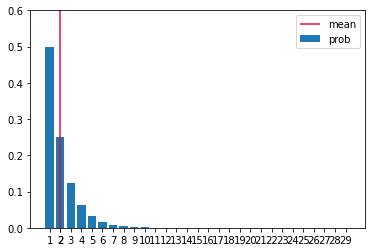

In [85]:
#[과제] 상기 기하분포의 확률함수와 기댓값을 시각화하세요
plot_prob(X)

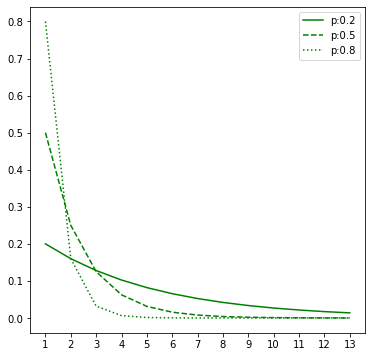

In [86]:
#[과제] 성공 확률(p)이 0.2,.0.5,0.8로 변할 떄 확류함수가 변하는 모습 시각화

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)

x_set = np.arange(1,14)
for p,ls in zip([0.2,0.5,0.8],linestyles):
    rv=stats.geom(p)
    ax.plot(x_set,rv.pmf(x_set),label=f'p:{p}',ls=ls,color='g')
ax.set_xticks(x_set)
ax.legend()
plt.show()

In [87]:
# 야구선수가 홈런칠 확률 0.05, 6타석만에 홈런칠 확률은?
from scipy.stats import geom
rv =geom(p=0.05)
rv.pmf(6) #총 시도횟수

0.038689046874999994

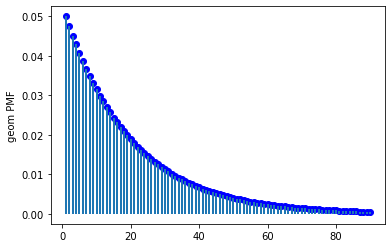

In [88]:
rv=geom(p=0.05)
x =np.arange(1,91)
pmf_geom = rv.pmf(x)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x,pmf_geom,'bo')
ax.vlines(x,0,pmf_geom,lw=2)
ax.set_ylabel('geom PMF')
plt.show()

#### 포아송 분포
-  임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포이며 포아송 분포의
 파라미터는 $\lambda$ (람다)로 나타낸다.
- 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생건수는 Poi(2)를 따른다.
   예) 하루에 교통사고가 한 건도 일어나지 않을 확률: 
    P(X=0) = 2!/0! * $e^{-2}$ = 0.135
    #e가 자연상수이고, 약 2.72818이다
- 포아송 분포의 기댓값과 분산 모두 $\lambda$ 가 된다.

In [142]:
#[과제] 사용자 함수를 구하세요(단, 확률변수 1부터 19이하 정수로 설정)
from scipy.special import factorial
def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam,x)/factorial(x) *np.exp(-lam)
        else:
            return 0
        
    return x_set,f


In [145]:
#[과제]  람다가 3일때 기댓값과 분산을 구하세요
lam=3
X=Poi(lam)
check_prob(X)

expected value 3.0
variance 3.0


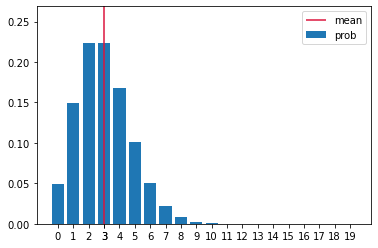

In [146]:
#[과제]  상기 포아송분포의 확률함수와 기댓값을 시각화하세요
plot_prob(X)

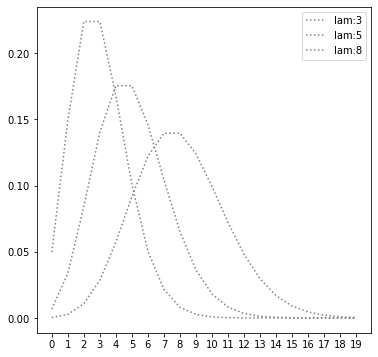

In [92]:
#[과제] 람다가 3,5,8로 변할 때 확률함수가 변하는 모습을 시각화
fig=plt.figure(figsize=(6,6))
ax =fig.add_subplot(111)

x_set = np.arange(20)
for lam,Is in zip([3,5,8],linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set,rv.pmf(x_set),
           label=f'lam:{lam}',ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()
plt.show()

In [ ]:
#[과제] 베르누이.이항,기하,포아송분포의 사례를 각가 2개씩 제시하세요

In [101]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x*(1-p)**(1-x) # p의 x승 곱하기 1-p에 1-x승
        # 확률변수 (x) ,(1-p)는 실패하는 확률에는 (1-x)승
        else:
            return 0
    return x_set,f
p=0.3
X=Bern(p)
X
#베르누이는  x_set이 np.array([0,1]) 이여야한다

(array([0, 1]), <function __main__.Bern.<locals>.f(x)>)

In [102]:
#베르누이 주사위가 짝수가 나올 확률과 홀수가 나올 확률
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x*(1-p)**(1-x)
        else:
            return 0
    return x_set,f

p=0.5
X=Bern(p)
check_prob(X)

expected value 0.5
variance 0.25


In [100]:
#베르누이 검은공 3개와 흰공 7개가 있는 주머니에서 흰공이 나오면 성공
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x*(1-p)**(1-x)
        else:
            return 0
    return x_set,f

p=0.7
X=Bern(p)
check_prob(X)

expected value 0.7
variance 0.21


In [99]:
rv= stats.bernoulli(p)
rv.pmf(0),rv.pmf(1)

(0.30000000000000004, 0.7)

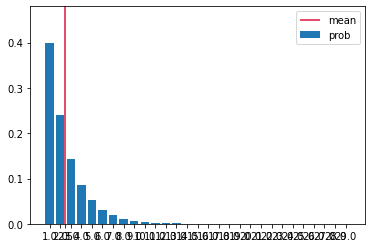

In [98]:
plot_prob(X)

In [103]:
#이항분포 15명의 환자에게 약을 투여해서 치료될 확률 0.7, 15명중 5명 환자가 치료될 확률
from scipy.special import comb

def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x)*p**x*(1-p)**(n-x)
        else:
            return 0
    return x_set,f

n=5
p=0.7
X =Bin(n,p)
check_prob(X)

expected value 3.5
variance 1.05


<BarContainer object of 5 artists>

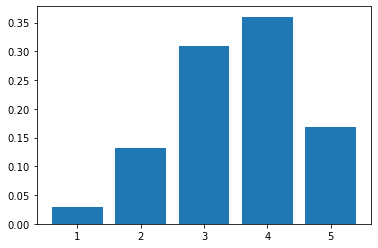

In [104]:
from scipy.special import comb

n=5
p=0.7
def Bin(n,x,p):
    return comb(n,x)*p**x*(1-p)**(n-x)
result=[]
for x in range(1,n+1):
    result.append(Bin(n,x,p))
plt.bar(range(1,n+1),result)

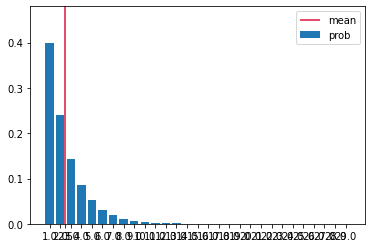

In [97]:
plot_prob(X)

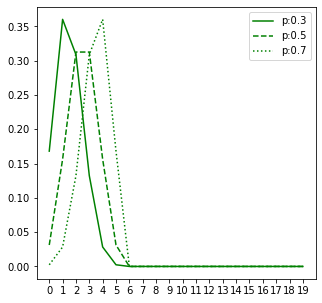

In [105]:
fig = plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
for p,ls in zip([0.3,0.5,0.7],linestyles):
    rv=stats.binom(n,p)
    ax.plot(x_set,rv.pmf(x_set),label=f'p:{p}',ls=ls,color='g')
ax.set_xticks(x_set)
ax.legend()
plt.show()

In [94]:
#이항분포 동전 100회 던져서 앞면이 60회 나올 확률 
from scipy.special import comb
def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x)*p**x*(1-p)**(n-x)
        else:
            return 0
    return x_set,f

n=100
p=0.5
X=Bin(n,p)
check_prob(X)

expected value 50.0
variance 25.0


In [95]:
#기하분포 : 처음 성공
def Ge(p):
    x_set = np.arange(1,30)
    def f(x):
        if x in x_set:
            return (1-p)**(x-1)*p
        else:
            return 0
    return x_set,f
p=0.4
#0.4부터 0.9까지만 되네? WHY?
X=Ge(p)
check_prob(X)


expected value 2.5
variance 3.75


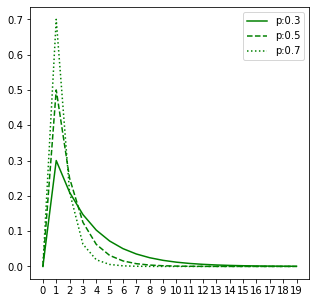

In [96]:
#기하분포는 geom 으로 확률변수를 받음 
fig = plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
for p,ls in zip([0.3,0.5,0.7],linestyles):
    rv=stats.geom(p)
    ax.plot(x_set,rv.pmf(x_set),label=f'p:{p}',ls=ls,color='g')
ax.set_xticks(x_set)
ax.legend()
plt.show()

 ### 포아송분포
  
 f(x)=$\lambda^x/x!*3^{-\lambda}$ $(x \in \{1,2,3,...\})$
 
  0                 (otherwise)

In [18]:
#포아송분포  임의의 사건이 단위 시간당 발생하는 건수
# 어떤 이발소에 1시간에 평균 3명의 손님이 찾아온다 
# 1시간에 4명이 찾아 올확률은
stats.poisson.cdf(4,mu=3)

0.8152632445237722

In [17]:
from scipy.special import factorial
def Poi(lam):
    x_set=np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam,x)/ factorial(x)*np.exp(-lam)
        else:
            return 0
    return x_set,f

lam=3
X=Poi(lam)

check_prob(X)


expected value 3.0
variance 3.0


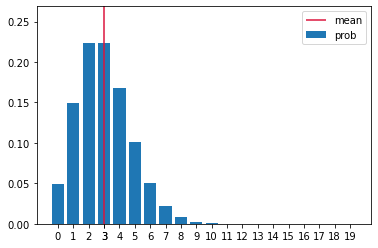

In [16]:
plot_prob(X)

In [131]:
#웹사이트 한시간당 평균 접속사 3명, 앞으로 1시간동안 접속자가 2명 이하일 확률은?

stats.poisson.cdf(2,mu=3)
#2보다 작을 떄 확률을 구하는 것 

0.42319008112684364

In [130]:
lam=3
X=Poi(lam)
check_prob(X)

expected value 3.0
variance 3.0


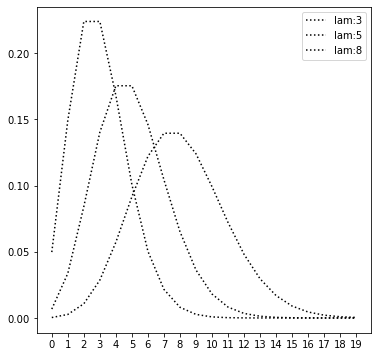

In [134]:
#람다가 커질수록 분산도 커져서 분포가 넓게 퍼지게 되는 것을 확인할 수 있습니다.
fig=plt.figure(figsize=(6,6))
ax =fig.add_subplot(111)

x_set = np.arange(20)
for lam,Is in zip([3,5,8],linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set,rv.pmf(x_set),
           label=f'lam:{lam}',ls=ls, color='black')
ax.set_xticks(x_set)
ax.legend()

plt.show()